In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from urllib.request import urlopen
from io import BytesIO

## CODE REPLICATION

In [22]:
# united_states_map = mpimg.imread("input/united_states_map.png")

url = "https://raw.githubusercontent.com/ridwaanhall/aco-algorithm/refs/heads/main/input/united_states_map.png"
response = urlopen(url)
united_states_map = mpimg.imread(BytesIO(response.read()))
def show_cities(path, w=12, h=8):
    """Plot a TSP path overlaid on a map of the US States & their capitals."""
    if isinstance(path, dict):      path = list(path.values())
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]    
    plt.imshow(united_states_map)    
    for x0, y0 in path:
        plt.plot(x0, y0, 'y*', markersize=15)  # y* = yellow star for starting point        
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])

def show_path(path, starting_city=None, w=12, h=8):
    """Plot a TSP path overlaid on a map of the US States & their capitals."""
    if isinstance(path, dict):      path = list(path.values())
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]
    
    starting_city = starting_city or path[0]
    x, y = list(zip(*path))
    #_, (x0, y0) = starting_city
    (x0, y0) = starting_city
    plt.imshow(united_states_map)
    # plt.plot(x0, y0, 'y*', markersize=15)  # y* = yellow star for starting point
    plt.plot(x + x[:1], y + y[:1])  # include the starting point at the end of path
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])
    
def polyfit_plot(x,y,deg, **kwargs):
    coefficients = np.polyfit(x,y,deg,**kwargs)
    poly  = np.poly1d(coefficients)
    new_x = np.linspace(x[0], x[-1])
    new_y = poly(new_x)
    plt.plot(x, y, "o", new_x, new_y)
    plt.xlim([x[0]-1, x[-1] + 1 ])
    
    terms = []
    for p, c in enumerate(reversed(coefficients)):
        term = str(round(c,1))
        if p == 1: term += 'x'
        if p >= 2: term += 'x^'+str(p)
        terms.append(term)        
    plt.title(" + ".join(reversed(terms)))
    
def distance(xy1, xy2) -> float:
    if isinstance(xy1[0], str): xy1 = xy1[1]; xy2 = xy2[1];               # if xy1 == ("Name", (x,y))
    return math.sqrt( (xy1[0]-xy2[0])**2 + (xy1[1]-xy2[1])**2 )

def path_distance(path) -> int:
    if isinstance(path, dict):      path = list(path.values())            # if path == {"Name": (x,y)}
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]   # if path == ("Name", (x,y))
    return int(sum(
        [ distance(path[i],  path[i+1]) for i in range(len(path)-1) ]
      + [ distance(path[-1], path[0]) ]                                   # include cost of return journey
    ))

## CITIES

In [23]:
cities = { 
    "Oklahoma City": (392.8, 356.4), # Oklahoma
    "Montgomery": (559.6, 404.8), # Alabama
    "Saint Paul": (451.6, 186.0), # Minnesota
    "Trenton": (698.8, 239.6), # New Jersey
    "Salt Lake City": (204.0, 243.2), # Utah
    "Columbus": (590.8, 263.2), # Ohio
    "Austin": (389.2, 448.4), # Texas
    "Phoenix": (179.6, 371.2), # Arizona
    "Hartford": (719.6, 205.2), # Connecticut
    "Baton Rouge": (489.6, 442.0), # Louisiana
    "Salem": (80.0, 139.2), # Oregon
    "Little Rock": (469.2, 367.2), # Arkansas
    "Richmond": (673.2, 293.6), # Virginia
    "Jackson": (501.6, 409.6), # Mississippi
    "Des Moines": (447.6, 246.0), # Iowa
    "Lansing": (563.6, 216.4), # Michigan
    "Denver": (293.6, 274.0), # Colorado
    "Boise": (159.6, 182.8), # Idaho
    "Raleigh": (662.0, 328.8), # North Carolina
    "Atlanta": (585.6, 376.8), # Georgia
    "Madison": (500.8, 217.6), # Wisconsin
    "Indianapolis": (548.0, 272.8), # Indiana
    "Nashville": (546.4, 336.8), # Tennessee
    "Columbia": (632.4, 364.8), # South Carolina
    "Providence": (735.2, 201.2), # Rhode Island
    "Boston": (738.4, 190.8), # Massachusetts
    "Tallahassee": (594.8, 434.8), # Florida
    "Sacramento": (68.4, 254.0), # California
    "Albany": (702.0, 193.6), # New York
    "Harrisburg": (670.8, 244.0) # Pennsylvania
}

## ROUTES

In [24]:
route = [
    "Salem", # Oregon
    "Sacramento", # California
    "Phoenix", # Arizona
    "Salt Lake City", # Utah
    "Saint Paul", # Minnesota
    "Des Moines", # Iowa
    "Madison", # Wisconsin
    "Lansing", # Michigan
    "Indianapolis", # Indiana
    "Columbus", # Ohio
    "Harrisburg", # Pennsylvania
    "Trenton", # New Jersey
    "Boston", # Massachusetts
    "Providence", # Rhode Island
    "Hartford", # Connecticut
    "Albany", # New York
    "Richmond", # Virginia
    "Raleigh", # North Carolina
    "Columbia", # South Carolina
    "Atlanta", # Georgia
    "Tallahassee", # Florida
    "Montgomery", # Alabama
    "Nashville", # Tennessee
    "Little Rock", # Arkansas
    "Baton Rouge", # Louisiana
    "Jackson", # Mississippi
    "Austin", # Texas
    "Oklahoma City", # Oklahoma
    "Denver", # Colorado
    "Boise", # Idaho
    # "Salem", # Oregon
]

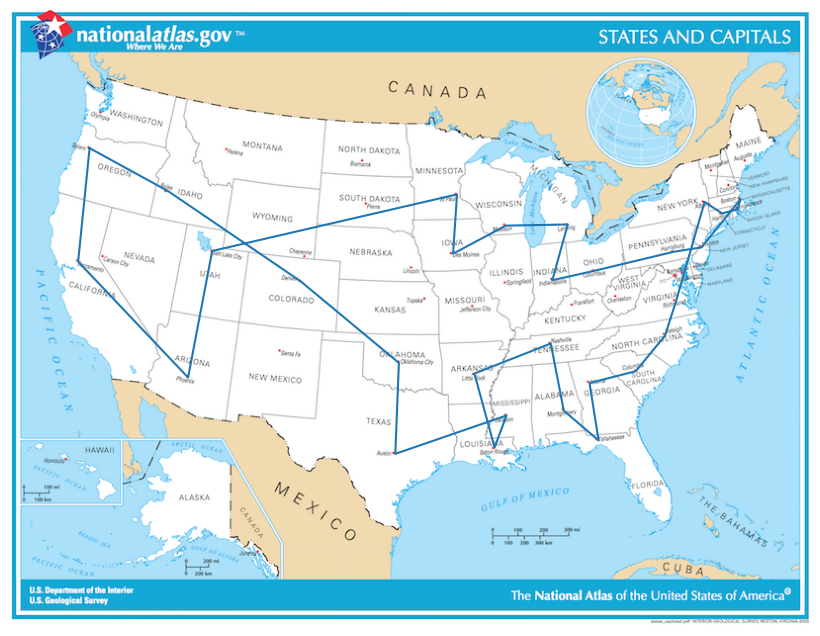

In [25]:
path = [cities[city] for city in route]
show_path(path)
plt.show()

## ROUTES RESULTS

In [26]:
print(" -> ".join(route))

Salem -> Sacramento -> Phoenix -> Salt Lake City -> Saint Paul -> Des Moines -> Madison -> Lansing -> Indianapolis -> Columbus -> Harrisburg -> Trenton -> Boston -> Providence -> Hartford -> Albany -> Richmond -> Raleigh -> Columbia -> Atlanta -> Tallahassee -> Montgomery -> Nashville -> Little Rock -> Baton Rouge -> Jackson -> Austin -> Oklahoma City -> Denver -> Boise


In [27]:
for city in route:
    print(city)

Salem
Sacramento
Phoenix
Salt Lake City
Saint Paul
Des Moines
Madison
Lansing
Indianapolis
Columbus
Harrisburg
Trenton
Boston
Providence
Hartford
Albany
Richmond
Raleigh
Columbia
Atlanta
Tallahassee
Montgomery
Nashville
Little Rock
Baton Rouge
Jackson
Austin
Oklahoma City
Denver
Boise
